# Predicting High Global Sales for Video Games

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%time
# Compare Algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

CPU times: user 810 ms, sys: 350 ms, total: 1.16 s
Wall time: 1.07 s


In [3]:
df = pd.read_csv('data/video game data.csv')

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16448.000000,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.488996,0.263255,0.145010,0.077610,0.047333,0.533462,68.967679,26.360821,7.125046,162.229908
std,5.877470,0.813475,0.503303,0.308836,0.186721,1.547956,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [6]:
df["Global_Sales"].describe()

count    16717.000000
mean         0.533462
std          1.547956
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.530000
Name: Global_Sales, dtype: float64

In [7]:
features = ['Critic_Score', 'User_Score', 'User_Count', 
       'Action', 'Adventure', 'Fighting', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']

In [8]:
dummies = pd.get_dummies(df['Genre'])
df = pd.concat([df, dummies], axis=1)
df["hit"] = [1 if i > 1 else 0 for i in df["Global_Sales"]]

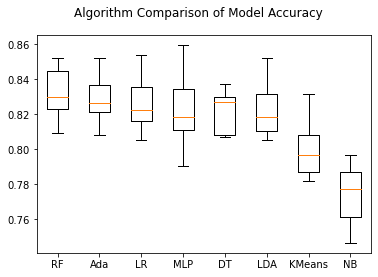

CPU times: user 24.9 s, sys: 1.67 s, total: 26.5 s
Wall time: 21.8 s


In [11]:
%%time
df=df.dropna()
X = df[features]  
Y = df['hit'] 
# prepare configuration for cross validation test harness
seed = 4373
# prepare models

mods = {'LR': LogisticRegression(solver='lbfgs', max_iter=10000),
'DT': DecisionTreeClassifier(max_depth=6),
'RF': RandomForestClassifier(max_depth=6),
'Ada': AdaBoostClassifier(),
'NB': GaussianNB(),
'KMeans': KNeighborsClassifier(),
'LDA': LinearDiscriminantAnalysis(),
'MLP': MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=5000)}

def cx_val(model, scoring='accuracy'):
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)

    return model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

cross_val = [cx_val(model) for model in mods.values()]
cross_val_df = pd.DataFrame.from_records(cross_val).T
cross_val_df.columns=mods.keys()

cross_val_df=cross_val_df.reindex(cross_val_df.mean().sort_values(ascending=False).index, axis=1)

fig = plt.figure()
fig.suptitle('Algorithm Comparison of Model Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(cross_val_df)
ax.set_xticklabels(cross_val_df.columns)
plt.show()

<BarContainer object of 13 artists>

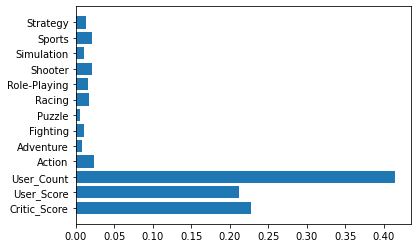

In [10]:
# Let's load the packages

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df[features]
y = df["hit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4373)

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

rf.feature_importances_

plt.barh(features, rf.feature_importances_)